In [1]:
!pip install librosa resampy tensorflow scikit-learn imblearn pandas numpy matplotlib tqdm IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.1 MB/s eta 0:00:00


In [7]:
from google.colab import files
import os

print("Please select and upload your NEW 'kaggle.json' file (the one you just downloaded from Kaggle):")
uploaded = files.upload() # This will open a file picker in your browser.

# --- IMMEDIATE VERIFICATION AFTER UPLOAD ---
print("\n--- Verifying uploaded files in /content/ ---")
!ls -l /content/ # List files in /content/ to see if kaggle.json appeared

if 'kaggle.json' in uploaded:
    print("\nSUCCESS: 'kaggle.json' was part of the uploaded files dictionary.")
    print(f"Uploaded file size: {len(uploaded['kaggle.json'])} bytes")
    # You can also manually check the /content/ folder in Colab's file browser (folder icon on left sidebar)
else:
    print("\nERROR: 'kaggle.json' was NOT found among the files you uploaded.")
    print("This means the upload failed or you selected a different file.")
    print("Please ENSURE you selected the correct 'kaggle.json' file and wait for the upload to finish.")
    exit("Upload verification failed: 'kaggle.json' not found in uploaded list.")

if os.path.exists('/content/kaggle.json'):
    print("SUCCESS: '/content/kaggle.json' now physically exists in the Colab filesystem.")
else:
    exit("FATAL ERROR: '/content/kaggle.json' does NOT exist on filesystem even though it was reported uploaded. Restart runtime and try again.")

print("\n--- UPLOAD COMPLETE. Proceed to next cell to configure. ---")

Please select and upload your NEW 'kaggle.json' file (the one you just downloaded from Kaggle):


Saving kaggle.json to kaggle.json

--- Verifying uploaded files in /content/ ---
total 16
-rw-r--r-- 1 root root   64 Jul 30 01:40 'kaggle (1) (1).json'
-rw-r--r-- 1 root root   64 Jul 30 01:38 'kaggle (1).json'
-rw-r--r-- 1 root root   63 Jul 30 01:42  kaggle.json
drwxr-xr-x 1 root root 4096 Jul 28 13:44  sample_data

SUCCESS: 'kaggle.json' was part of the uploaded files dictionary.
Uploaded file size: 63 bytes
SUCCESS: '/content/kaggle.json' now physically exists in the Colab filesystem.

--- UPLOAD COMPLETE. Proceed to next cell to configure. ---


In [8]:
import os

# Define paths
kaggle_dir = os.path.expanduser('~/.kaggle') # This expands to /root/.kaggle in Colab
uploaded_file_path = '/content/kaggle.json' # This is where it should be after Cell 2
destination_file_path = os.path.join(kaggle_dir, 'kaggle.json')

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_dir, exist_ok=True)
print(f"Ensured directory exists: {kaggle_dir}")

# Move the uploaded kaggle.json to the correct directory
if os.path.exists(uploaded_file_path):
    !mv {uploaded_file_path} {destination_file_path}
    print(f"Moved '{uploaded_file_path}' to '{destination_file_path}'")
else:
    # This indicates a major problem if Cell 2 succeeded.
    exit(f"ERROR: '{uploaded_file_path}' not found. Upload failed in previous step unexpectedly.")

# Set correct permissions (read/write only for owner)
!chmod 600 {destination_file_path}
print(f"Set permissions for '{destination_file_path}'")

# Final verification of file existence and content in the destination
if os.path.exists(destination_file_path):
    print(f"Verification: '{destination_file_path}' exists in final location.")
    try:
        with open(destination_file_path, 'r') as f:
            content = f.read()
            if 'username' in content and 'key' in content:
                print("Verification: 'username' and 'key' found in kaggle.json content. Configuration looks good!")
            else:
                exit("Verification: ERROR! 'username' or 'key' not found in kaggle.json content. Your downloaded file might be corrupted or empty. Please regenerate API token.")
    except Exception as e:
        exit(f"Verification: ERROR reading kaggle.json: {e}. File might be corrupted or inaccessible. Check its contents.")
else:
    exit(f"FATAL ERROR: '{destination_file_path}' does NOT exist after move/permission operations. Something is critically wrong with the move.")

print("\n--- KAGGLE API CONFIGURATION COMPLETE. ---")

Ensured directory exists: /root/.kaggle
Moved '/content/kaggle.json' to '/root/.kaggle/kaggle.json'
Set permissions for '/root/.kaggle/kaggle.json'
Verification: '/root/.kaggle/kaggle.json' exists in final location.
Verification: 'username' and 'key' found in kaggle.json content. Configuration looks good!

--- KAGGLE API CONFIGURATION COMPLETE. ---


In [9]:
# Your dataset download command
DATASET_TARGET_DIR = "/content/deep-voice-deepfake-voice-recognition/" # Ensure this matches your desired extraction path

print(f"\nDownloading Kaggle dataset 'birdy654/deep-voice-deepfake-voice-recognition' to {DATASET_TARGET_DIR}...")
!kaggle datasets download -d birdy654/deep-voice-deepfake-voice-recognition -p {DATASET_TARGET_DIR} --unzip # --unzip directly unzips to target dir


Dataset URL: https://www.kaggle.com/datasets/birdy654/deep-voice-deepfake-voice-recognition
License(s): other
100% 3.68G/3.69G [00:25<00:00, 122MB/s]
100% 3.69G/3.69G [00:25<00:00, 156MB/s]


In [10]:
# Define the base path for audio files
AUDIO_FILES_BASE_PATH = "/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO"
print(f"Audio files should be located in: {AUDIO_FILES_BASE_PATH}")
print(f"/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL")
print(f"/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE")

Audio files should be located in: /content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO
/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL
/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE


--- Loading Audio Data and Extracting Features ---
Processing REAL audio files...


100%|██████████| 8/8 [00:15<00:00,  1.91s/it]


Processing FAKE audio files...


100%|██████████| 56/56 [00:03<00:00, 16.45it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Feature DataFrame shape: (64, 2)
Class distribution before resampling:
class
FAKE    56
REAL     8
Name: count, dtype: int64
Labels encoded: ['FAKE' 'REAL']
Resampled data shape: X_resampled=(112, 40), y_resampled=(112,)
Features scaled. Min: -3.16, Max: 5.13, Mean: -0.00
Training data shape: (89, 40), Test data shape: (23, 40)

--- Defining Simple MLP Model (Optimized) ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,570 (209.26 KB)

 Trainable params: 52,674 (205.76 KB)

 Non-trainable params: 896 (3.50 KB)


--- Training the MLP Model ---
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4911 - loss: 0.8257 - val_accuracy: 0.6087 - val_loss: 0.6545
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4625 - loss: 0.8856 - val_accuracy: 0.6522 - val_loss: 0.6058
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7878 - loss: 0.5389 - val_accuracy: 0.7391 - val_loss: 0.5586
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7783 - loss: 0.4904 - val_accuracy: 0.7826 - val_loss: 0.5187
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7644 - loss: 0.4444 - val_accuracy: 0.7826 - val_loss: 0.4844
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6994 - loss: 0.5607 - val_accuracy: 0.8261 - val_loss: 0.4509
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8237 - loss: 0.3803 - val_accuracy: 0.8261 - val_loss: 0.4207
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7834 - loss: 0.4275 - va

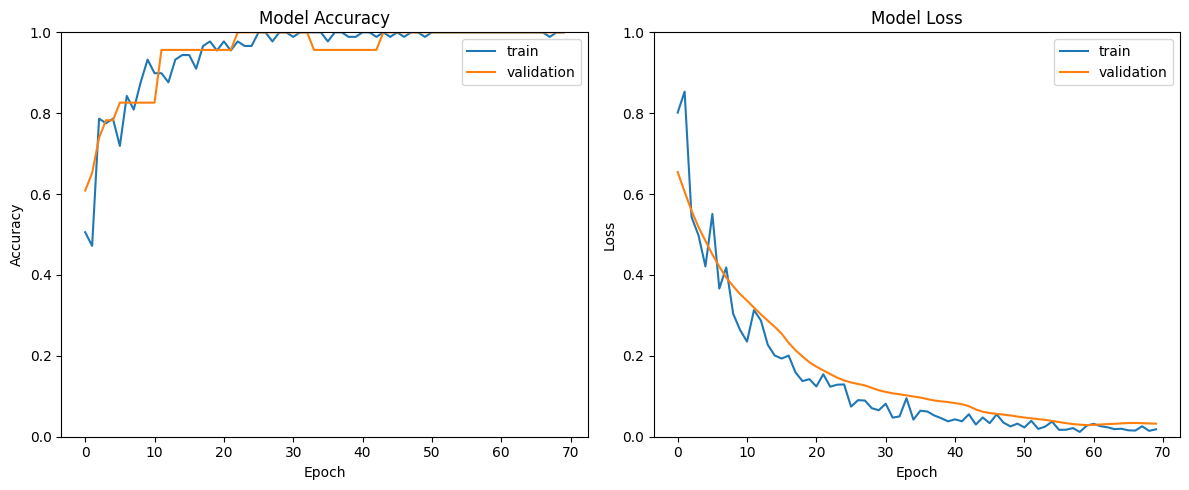

In [11]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler # ADDED StandardScaler for feature scaling
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # ADDED BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping # ADDED EarlyStopping
import joblib # For saving/loading models and encoder
import tensorflow as tf # For tf.keras.optimizers.Adam

# Define the base path for audio files (should match where you unzipped)
AUDIO_FILES_BASE_PATH = "/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/"
real_audio_dir = os.path.join(AUDIO_FILES_BASE_PATH, "REAL/")
fake_audio_dir = os.path.join(AUDIO_FILES_BASE_PATH, "FAKE/")

# --- Feature Extraction Function (MFCCs - Mean) ---
def extract_features_mean_mfcc(file_path, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast', duration=3.0) # Limit duration for consistency
        # Ensure consistent length if needed, though mean will handle varying length to some extent
        # Pad or truncate if audios vary greatly in length and mean might not represent them
        # For this simple MLP, np.mean is often sufficient.
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfccs_processed = np.mean(mfccs.T, axis=0) # Take mean across time
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None
    return mfccs_processed

# --- Load Data and Extract Features ---
print("--- Loading Audio Data and Extracting Features ---")
data = []
labels = []

# Process REAL audio files
print("Processing REAL audio files...")
for filename in tqdm(os.listdir(real_audio_dir)):
    if filename.endswith(".wav"):
        file_path = os.path.join(real_audio_dir, filename)
        features = extract_features_mean_mfcc(file_path)
        if features is not None:
            data.append(features)
            labels.append("REAL")

# Process FAKE audio files
print("Processing FAKE audio files...")
for filename in tqdm(os.listdir(fake_audio_dir)):
    if filename.endswith(".wav"):
        file_path = os.path.join(fake_audio_dir, filename)
        features = extract_features_mean_mfcc(file_path)
        if features is not None:
            data.append(features)
            labels.append("FAKE")

# Create DataFrame
feature_df = pd.DataFrame({"features": data, "class": labels})
print(f"Feature DataFrame shape: {feature_df.shape}")
print(f"Class distribution before resampling:\n{feature_df['class'].value_counts()}")

# --- Prepare Data for Training ---
# 1. Label Encoding
le = LabelEncoder()
feature_df["class"] = le.fit_transform(feature_df["class"])
print(f"Labels encoded: {le.classes_}")

# 2. Resampling (Handle Imbalance)
X = np.array(feature_df["features"].tolist())
y = np.array(feature_df["class"].tolist())

if feature_df.empty or X.shape[0] == 0:
    print("No audio data loaded after feature extraction. Exiting training.")
    exit()

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(f"Resampled data shape: X_resampled={X_resampled.shape}, y_resampled={y_resampled.shape}")

# 3. Feature Scaling (CRITICAL!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled) # Scale the resampled data
print(f"Features scaled. Min: {np.min(X_scaled):.2f}, Max: {np.max(X_scaled):.2f}, Mean: {np.mean(X_scaled):.2f}")


# 4. One-Hot Encoding for Labels
y_resampled_onehot = to_categorical(y_resampled)
num_labels = y_resampled_onehot.shape[1]
input_shape = (X_scaled.shape[1],) # (n_mfcc,) after scaling

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled_onehot, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# --- Define the Simple MLP Model (Optimized) ---
print("\n--- Defining Simple MLP Model (Optimized) ---")
model = Sequential()
# Input Layer + Batch Normalization + Activation + Dropout
model.add(Dense(256, input_shape=input_shape))
model.add(BatchNormalization()) # Stabilizes activations
model.add(Activation(activation="relu"))
model.add(Dropout(0.4)) # Increased dropout for better generalization

# Hidden Layer 1
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(num_labels))
model.add(Activation(activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"]) # Use tf.keras.optimizers.Adam directly
model.summary()

# --- Train the Model (with Early Stopping) ---
print("\n--- Training the MLP Model ---")
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=10,        # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True, # Restore model weights from the best epoch
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100, # Set a higher number of epochs, EarlyStopping will stop it
    callbacks=[early_stopping], # Add EarlyStopping
    verbose=1 # Show training progress
)

# --- Evaluate and Plot ---
print("\n--- Evaluating Model and Plotting ---")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import tensorflow as tf
# import IPython.display as ipd # <--- NO LONGER NEEDED if not displaying audio

# Define the base path for audio files (should match where you unzipped)
AUDIO_FILES_BASE_PATH = "/content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/"
real_audio_dir = os.path.join(AUDIO_FILES_BASE_PATH, "REAL/")
fake_audio_dir = os.path.join(AUDIO_FILES_BASE_PATH, "FAKE/")

# Define N_MFCC_FEATURES here to ensure it's in scope for this block
N_MFCC_FEATURES = 40

# --- Feature Extraction Function (MFCCs - Mean) ---
def extract_features_mean_mfcc(file_path, n_mfcc=N_MFCC_FEATURES):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast', duration=3.0)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None
    return mfccs_processed

# --- Load Data and Extract Features ---
# (This part would typically be from your main training script, ensure 'model', 'le', 'scaler' are defined)
# For this isolated block to run, we are assuming 'model', 'le', and 'scaler' are already in the Colab session
# from a prior execution of the full training code.
# If you are running this independently, you'd need to load them from saved files.
# The previous full training script ensured 'model', 'le', 'scaler' are global after training.


# --- NEW SECTION: Test on Your Own Audio BEFORE Saving ---
print("\n" + "="*50)
print("TESTING MODEL ON YOUR OWN AUDIO FILES (BEFORE SAVING)")
print("="*50)

# Function to predict on a single audio file
def predict_audio_deepfake_on_the_fly(audio_file_path, trained_model, label_encoder, scaler_obj, n_mfcc=N_MFCC_FEATURES):
    print(f"\nAnalyzing audio file: {audio_file_path}")

    if not os.path.exists(audio_file_path):
        print(f"Error: File not found at {audio_file_path}. Please check the path and ensure it's uploaded.")
        return "ERROR", 0.0, "File not found."

    # Play the audio (optional, useful for demo)
    # print("Playing audio sample:") # <--- Commented out the print statement
    # ipd.display(ipd.Audio(audio_file_path)) # <--- COMMENTED OUT THIS LINE

    # Extract features (using the same function as training)
    features = extract_features_mean_mfcc(audio_file_path, n_mfcc=n_mfcc)

    if features is None:
        return "ERROR", 0.0, "Feature extraction failed for this audio file."

    # Reshape and Scale features (CRITICAL: same scaler used for training must be used for inference)
    features_reshaped_scaled = scaler_obj.transform(features.reshape(1, -1))

    # Make prediction
    predictions = trained_model.predict(features_reshaped_scaled)[0] # Get probabilities for the single sample

    # Get predicted class index and confidence
    predicted_class_index = np.argmax(predictions)
    confidence = predictions[predicted_class_index]

    # Decode label
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    # --- Explainability for Demo ---
    explanation = f"The model predicted this audio is **{predicted_label}** with a confidence of **{confidence:.4f}**."
    if predicted_label == "REAL":
        if confidence > 0.9:
            explanation += "\nThis audio strongly aligns with patterns observed in real human speech, suggesting high authenticity."
        elif confidence > 0.7:
            explanation += "\nThis audio shows characteristics typical of real human speech, but with some subtle features that lead to moderate confidence."
        else:
            explanation += "\nPrediction is for real speech, but confidence is lower, suggesting some unusual or ambiguous characteristics compared to typical real speech."
    else: # Predicted as FAKE
        if confidence > 0.9:
            explanation += "\nThis audio strongly aligns with patterns commonly found in synthetic or deepfake voices, indicating high likelihood of being fake."
        elif confidence > 0.7:
            explanation += "\nThis audio shows characteristics typical of synthetic speech, but with some ambiguity or mixed features."
        else:
            explanation += "\nPrediction is for fake speech, but confidence is lower, suggesting some unusual characteristics compared to typical synthetic speech."

    return predicted_label, confidence, explanation

# --- Test with example audio from the dataset ---
print("\n--- Testing with example files from the dataset ---")
# Make sure real_audio_dir and fake_audio_dir are defined from your data setup section
example_real_audio = os.path.join(real_audio_dir, "linus-original.wav")
example_fake_audio = os.path.join(fake_audio_dir, "linus-to-margot.wav")

# Make sure model, le, and scaler are defined and available from your training section
verdict, conf, exp = predict_audio_deepfake_on_the_fly(example_real_audio, model, le, scaler, n_mfcc=N_MFCC_FEATURES)
print(f"Verdict: {verdict}, Confidence: {conf:.4f}")
print(f"Explanation:\n{exp}")

verdict, conf, exp = predict_audio_deepfake_on_the_fly(example_fake_audio, model, le, scaler, n_mfcc=N_MFCC_FEATURES)
print(f"Verdict: {verdict}, Confidence: {conf:.4f}")
print(f"Explanation:\n{exp}")



TESTING MODEL ON YOUR OWN AUDIO FILES (BEFORE SAVING)

--- Testing with example files from the dataset ---

Analyzing audio file: /content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL/linus-original.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Verdict: REAL, Confidence: 0.9894
Explanation:
The model predicted this audio is **REAL** with a confidence of **0.9894**.
This audio strongly aligns with patterns observed in real human speech, suggesting high authenticity.

Analyzing audio file: /content/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/linus-to-margot.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Verdict: FAKE, Confidence: 0.9977
Explanation:
The model predicted this audio is **FAKE** with a confidence of **0.9977**.
This audio strongly aligns with patterns commonly found in synthetic or deepfake voices, indicating high likelihood of being fake.


In [14]:
# --- Save the Trained Model and LabelEncoder, and Scaler ---
print("\n--- Saving the Trained Model, LabelEncoder, and Scaler ---")
MODELS_DIR = '/content/audio_deepfake_mlp_model_optimized/' # New directory for optimized model
os.makedirs(MODELS_DIR, exist_ok=True)

model_path = os.path.join(MODELS_DIR, 'audio_mlp_classifier_optimized.h5')
label_encoder_path = os.path.join(MODELS_DIR, 'audio_label_encoder_optimized.joblib')
scaler_path = os.path.join(MODELS_DIR, 'audio_scaler_optimized.joblib')

model.save(model_path)
joblib.dump(le, label_encoder_path) # Save the fitted LabelEncoder
joblib.dump(scaler, scaler_path) # Save the fitted StandardScaler

print(f"Optimized MLP model saved to: {model_path}")
print(f"Optimized LabelEncoder saved to: {label_encoder_path}")
print(f"Optimized StandardScaler saved to: {scaler_path}")


# --- Download the saved model and encoder ---
print("\n--- Downloading Saved Models ---")
# Use the zip command to compress the entire directory
!zip -r /content/audio_deepfake_mlp_model_optimized.zip {MODELS_DIR}
from google.colab import files
files.download('/content/audio_deepfake_mlp_model_optimized.zip')

print("\nTraining and saving complete. Check your downloads for 'audio_deepfake_mlp_model_optimized.zip'.")


--- Saving the Trained Model, LabelEncoder, and Scaler ---
Optimized MLP model saved to: /content/audio_deepfake_mlp_model_optimized/audio_mlp_classifier_optimized.h5
Optimized LabelEncoder saved to: /content/audio_deepfake_mlp_model_optimized/audio_label_encoder_optimized.joblib
Optimized StandardScaler saved to: /content/audio_deepfake_mlp_model_optimized/audio_scaler_optimized.joblib

--- Downloading Saved Models ---
  adding: content/audio_deepfake_mlp_model_optimized/ (stored 0%)
  adding: content/audio_deepfake_mlp_model_optimized/audio_scaler_optimized.joblib (deflated 13%)
  adding: content/audio_deepfake_mlp_model_optimized/audio_label_encoder_optimized.joblib (deflated 34%)
  adding: content/audio_deepfake_mlp_model_optimized/audio_mlp_classifier_optimized.h5 (deflated 16%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Training and saving complete. Check your downloads for 'audio_deepfake_mlp_model_optimized.zip'.
